In [10]:
#import serial
#import time
#ser = serial.Serial('/dev/tty.hirojiren-SerialPortPro', 115200, timeout=None)



In [11]:
#ser.write(b"1")
##time.sleep(0.2)
#line = ser.read(2)
#print(line)

In [12]:
#ser.write(b"3")
#line = ser.read(20)
#print(line)

In [13]:
#ser.close()

In [14]:
import image_processing
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
import numpy as np
from sklearn.datasets import load_files   

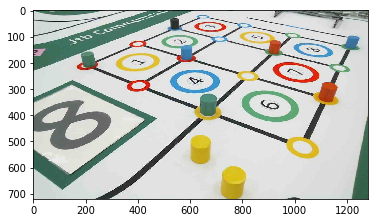

In [70]:
IMAGE_DIR   = "image_fukuyama/"
image_list = image_processing.load_image_set(IMAGE_DIR)
image = image_list[23]
plt.imshow(image)


In [71]:
img_psp = image_processing.persipective_image(image)
masked_image = image_processing.masked_image(img_psp)
block_img = []
num_img, block_img = image_processing.triming_image(masked_image)


In [72]:
len(block_img)

24

In [73]:
for i in range(len(block_img)):
    filename = 'block_image/input/node/'
    if i < 10:
        filename = filename + str(0)+str(i)+'.jpg'
    else:
        filename = filename +str(i)+'.jpg'
    dst = cv2.cvtColor(block_img[i],cv2.COLOR_BGR2RGB)
    cv2.imwrite(filename, dst)

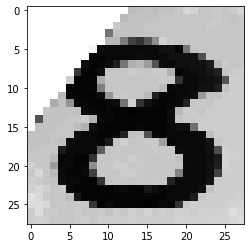

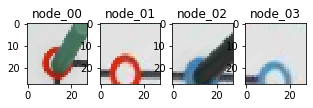

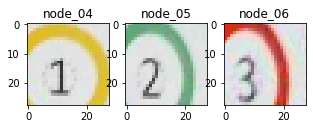

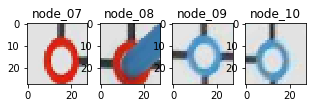

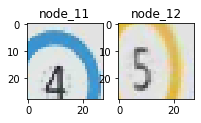

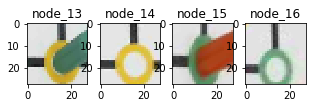

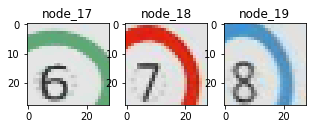

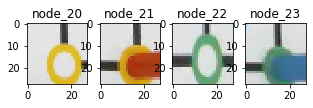

In [74]:
#plot triming and standardized image
plt.imshow(num_img, plt.cm.gray)

f, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(5,5))
ax1.set_title('node_00')
ax1.imshow(block_img[0])
ax2.set_title('node_01')
ax2.imshow(block_img[1])
ax3.set_title('node_02')
ax3.imshow(block_img[2])
ax4.set_title('node_03')
ax4.imshow(block_img[3])

f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(5,5))
ax1.set_title('node_04')
ax1.imshow(block_img[4])
ax2.set_title('node_05')
ax2.imshow(block_img[5])
ax3.set_title('node_06')
ax3.imshow(block_img[6])

f, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(5,5))
ax1.set_title('node_07')
ax1.imshow(block_img[7])
ax2.set_title('node_08')
ax2.imshow(block_img[8])
ax3.set_title('node_09')
ax3.imshow(block_img[9])
ax4.set_title('node_10')
ax4.imshow(block_img[10])

f, (ax1, ax2) = plt.subplots(1, 2, figsize=(3,3))
ax1.set_title('node_11')
ax1.imshow(block_img[11])
ax2.set_title('node_12')
ax2.imshow(block_img[12])

f, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(5,5))
ax1.set_title('node_13')
ax1.imshow(block_img[13])
ax2.set_title('node_14')
ax2.imshow(block_img[14])
ax3.set_title('node_15')
ax3.imshow(block_img[15])
ax4.set_title('node_16')
ax4.imshow(block_img[16])

f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(5,5))
ax1.set_title('node_17')
ax1.imshow(block_img[17])
ax2.set_title('node_18')
ax2.imshow(block_img[18])
ax3.set_title('node_19')
ax3.imshow(block_img[19])


f, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(5,5))
ax1.set_title('node_20')
ax1.imshow(block_img[20])
ax2.set_title('node_21')
ax2.imshow(block_img[21])
ax3.set_title('node_22')
ax3.imshow(block_img[22])
ax4.set_title('node_23')
ax4.imshow(block_img[23])



In [75]:
from keras.preprocessing import image                  
from tqdm import tqdm

def path_to_tensor(img_path):
    # loads RGB image as PIL.Image.Image type
    img = image.load_img(img_path, target_size=(28, 28))
    # convert PIL.Image.Image type to 3D tensor with shape (224, 224, 3)
    x = image.img_to_array(img)
    # convert 3D tensor to 4D tensor with shape (1, 224, 224, 3) and return 4D tensor
    return np.expand_dims(x, axis=0)

def paths_to_tensor(img_paths):
    list_of_tensors = [path_to_tensor(img_path) for img_path in tqdm(img_paths)]
    return np.vstack(list_of_tensors)

In [76]:
from keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D
from keras.layers import Dropout, Flatten, Dense
from keras.models import Sequential

model = Sequential()


model.add( Conv2D(16,  kernel_size = (2, 2),  input_shape=(28, 28, 3), activation = 'relu', strides = 1, padding = 'valid'))
model.add( MaxPooling2D(pool_size = (2, 2),  strides = 2))
model.add( Conv2D(32, kernel_size = (2, 2),  activation = 'relu', strides = 1, padding = 'valid'))
model.add( MaxPooling2D(pool_size = (2, 2),  strides = 2))
model.add( Conv2D(64, kernel_size = (2, 2),  activation = 'relu', strides = 1, padding = 'valid'))
model.add( MaxPooling2D(pool_size = (2, 2),  strides = 2))
model.add( GlobalAveragePooling2D())
model.add( Dense(units = 6, activation = 'softmax'))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 27, 27, 16)        208       
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 13, 13, 16)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 12, 12, 32)        2080      
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 6, 6, 32)          0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 5, 5, 64)          8256      
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 2, 2, 64)          0         
_________________________________________________________________
global_average_pooling2d_3 ( (None, 64)                0         
__________

In [77]:
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

In [78]:
model.load_weights('saved_models/weights.best.from_scratch.hdf5')

In [79]:
data = load_files('block_image/input')
input_files = np.array(data['filenames'])
input_files = np.sort(input_files)
input_tensors = paths_to_tensor(input_files).astype('float32')/255

100%|██████████| 24/24 [00:00<00:00, 2153.41it/s]


In [80]:
#input_tensors
result = model.predict_proba(input_tensors, batch_size = 2)

In [81]:
block_image_list = []

for i in range(len(result)):
    im = mpimg.imread(input_files[i])
    block_image_list.append(im)

In [82]:
print('0:none 1:red 2:green 3:blue 4:yellow 5:gray')
label = ['none','red','green', 'blue', 'yellow','gray']
label[np.argmax(result[0])]


0:none 1:red 2:green 3:blue 4:yellow 5:gray


'green'

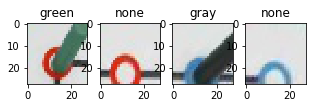

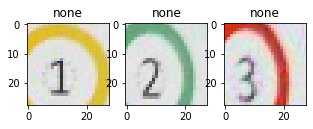

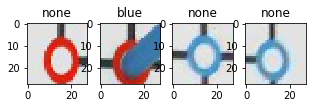

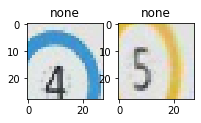

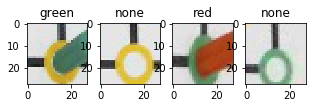

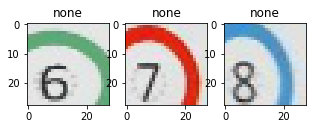

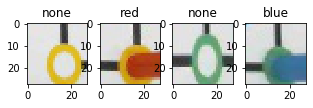

In [83]:


f, (ax1, ax2, ax3, ax4) = plt.subplots(1,4, figsize=(5,5))
    
ax1.set_title(label[np.argmax(result[0])])
ax1.imshow(block_image_list[0])

ax2.set_title(label[np.argmax(result[1])])
ax2.imshow(block_image_list[1])

ax3.set_title(label[np.argmax(result[2])])
ax3.imshow(block_image_list[2])

ax4.set_title(label[np.argmax(result[3])])
ax4.imshow(block_image_list[3])

f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(5,5))
ax1.set_title(label[np.argmax(result[4])])
ax1.imshow(block_image_list[4])

ax2.set_title(label[np.argmax(result[5])])
ax2.imshow(block_image_list[5])

ax3.set_title(label[np.argmax(result[6])])
ax3.imshow(block_image_list[6])


f, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(5,5))
ax1.set_title(label[np.argmax(result[7])])
ax1.imshow(block_image_list[7])

ax2.set_title(label[np.argmax(result[8])])
ax2.imshow(block_image_list[8])

ax3.set_title(label[np.argmax(result[9])])
ax3.imshow(block_image_list[9])

ax4.set_title(label[np.argmax(result[10])])
ax4.imshow(block_image_list[10])


f, (ax1, ax2) = plt.subplots(1, 2, figsize=(3,3))
ax1.set_title(label[np.argmax(result[11])])
ax1.imshow(block_image_list[11])

ax2.set_title(label[np.argmax(result[12])])
ax2.imshow(block_image_list[12])


f, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(5,5))
ax1.set_title(label[np.argmax(result[13])])
ax1.imshow(block_image_list[13])

ax2.set_title(label[np.argmax(result[14])])
ax2.imshow(block_image_list[14])

ax3.set_title(label[np.argmax(result[15])])
ax3.imshow(block_image_list[15])

ax4.set_title(label[np.argmax(result[16])])
ax4.imshow(block_image_list[16])

f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(5,5))
ax1.set_title(label[np.argmax(result[17])])
ax1.imshow(block_image_list[17])

ax2.set_title(label[np.argmax(result[18])])
ax2.imshow(block_image_list[18])

ax3.set_title(label[np.argmax(result[19])])
ax3.imshow(block_image_list[19])

f, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(5,5))
ax1.set_title(label[np.argmax(result[20])])
ax1.imshow(block_image_list[20])

ax2.set_title(label[np.argmax(result[21])])
ax2.imshow(block_image_list[21])

ax3.set_title(label[np.argmax(result[22])])
ax3.imshow(block_image_list[22])

ax4.set_title(label[np.argmax(result[23])])
ax4.imshow(block_image_list[23])
